# Sampling Methods

It’s time to get hands-on and perform the four random sampling methods in Python: simple, systematic, stratified, and cluster.

In [199]:
import pandas as pd
attrition_pop = pd.read_feather('C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\Datasets\\attrition.feather')
print(attrition_pop.head())

   Age  Attrition     BusinessTravel  DailyRate            Department  \
0   21        0.0      Travel_Rarely        391  Research_Development   
1   19        1.0      Travel_Rarely        528                 Sales   
2   18        1.0      Travel_Rarely        230  Research_Development   
3   18        0.0      Travel_Rarely        812                 Sales   
4   18        1.0  Travel_Frequently       1306                 Sales   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                15        College  Life_Sciences                    High   
1                22  Below_College      Marketing               Very_High   
2                 3       Bachelor  Life_Sciences                    High   
3                10       Bachelor        Medical               Very_High   
4                 5       Bachelor      Marketing                  Medium   

   Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0    Male  ...    

# 1. Simple random and systematic sampling

<b>1.1 Simple random sampling</b>

The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [200]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

Notice how the indexes in the sample aren't always in increasing order. They are just random.

<b>1.2 Systematic sampling</b>

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

21
      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences

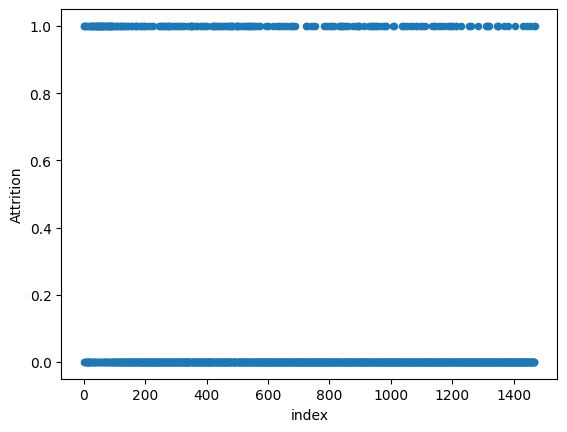

In [201]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size
print(interval)

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

# Checking if there is a trouble with systematic sampling by plotting the sample and check if there is a pettern in the plot
import matplotlib.pyplot as plt
plt.style.use("default")
attrition_pop_id = attrition_pop.reset_index()
attrition_pop_id.plot(x='index', y='Attrition', kind="scatter")
plt.show()

Systematic sampling avoids randomness by picking rows at regular intervals.

<b>1.3 Is systematic sampling OK?</b>

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

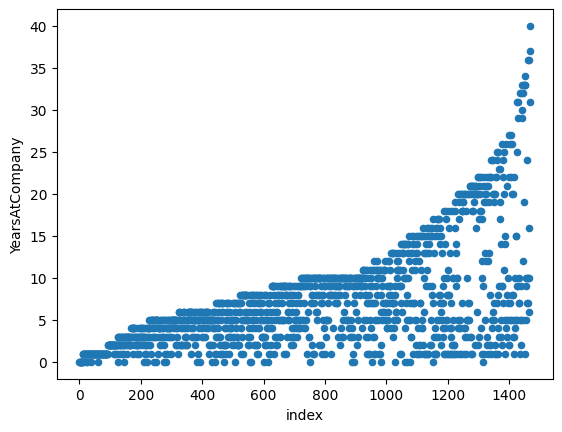

In [202]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

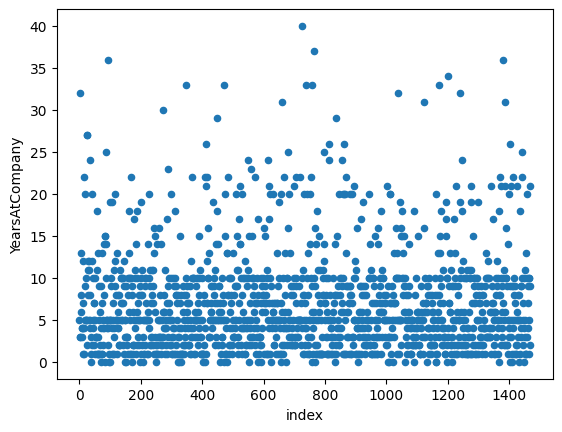

In [203]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

<b>Question</b>

Does a systematic sample always produce a sample similar to a simple random sample?

Possible Answers

- Yes. All sampling (random or non-random) methods will lead us to similar results.

- Yes. We should always expect a representative sample for both systematic and simple random sampling.

- No. This only holds if a seed has been set for both processes.

- No. This is not true if the data is sorted in some way. (True)

<b>Note</b>: Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

# 2. Stratified and weighted random sampling

Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.

<b>2.1 Proportional stratified sampling</b>

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup. 

In [204]:
'''Get the proportion of employees by Education level from attrition_pop.'''

# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [205]:
# Proportional stratified sampling for 40% of each Education group
education_strat_without_grouping = attrition_pop.sample(frac=0.4, random_state=2022)

# Print education_counts_strat
education_counts_strat_without_grouping= education_strat_without_grouping['Education'].value_counts(normalize=True)
print(education_counts_strat_without_grouping)

Bachelor         0.384354
Master           0.267007
College          0.200680
Below_College    0.122449
Doctor           0.025510
Name: Education, dtype: float64


In [206]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').\
    sample(frac=0.4, random_state=2022)

# Print the sample
# print(attrition_strat)

In [207]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)
# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


By grouping then sampling, the size of each group in the sample is representative more than without grouping of the size of the sample in the population.

<b>2.2 Equal counts stratified sampling</b>

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [208]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

<b>2.3 Weighted sampling</b>

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

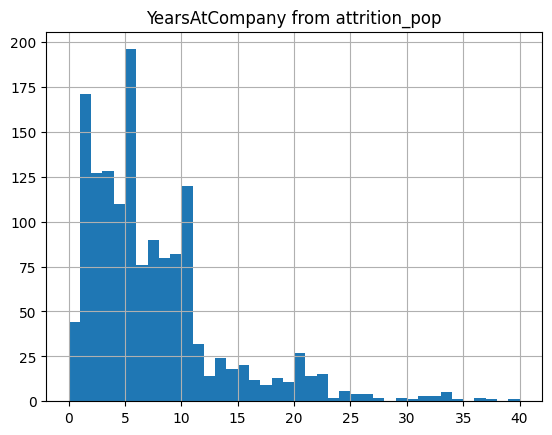

In [209]:
'''Plot YearsAtCompany from attrition_pop as a histogram with bins of width 1 from 0 to 40'''
import numpy as np
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.title('YearsAtCompany from attrition_pop')
plt.show()

In [210]:
'''Sample 400 employees from attrition_pop weighted by YearsAtCompany'''

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights='YearsAtCompany')

# Print the sample
# print(attrition_weight)

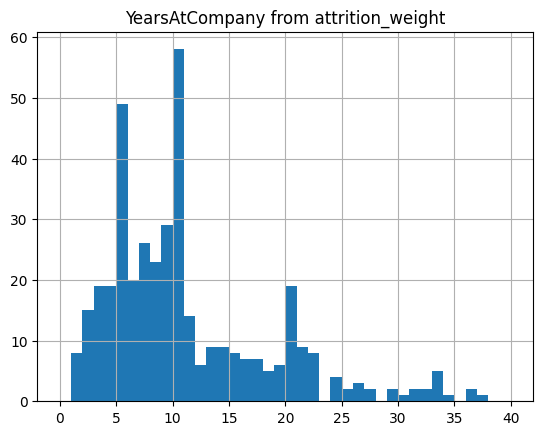

In [211]:
'''Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40'''
import numpy as np
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.title('YearsAtCompany from attrition_weight')
plt.show()

<b>Question</b>

Which is higher? The mean YearsAtCompany from attrition_pop or the mean YearsAtCompany from attrition_weight?

Possible Answers
- Population mean.

- Both means are identical.

- Sample mean. ------------------------------True

- It is impossible to calculate the two means.

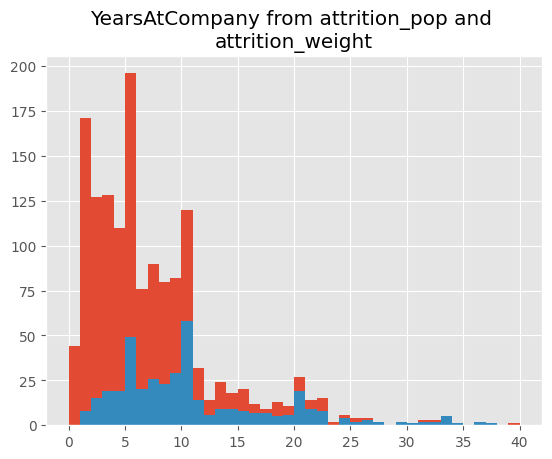

The mean YearsAtCompany from attrition_pop is:  7.0081632653061225
The mean YearsAtCompany from attrition_weight is:  10.78


In [212]:
# Plot YearsAtCompany from attrition_pop and attrition_weight on the same plot as histograms
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.hist(attrition_pop['YearsAtCompany'], bins=np.arange(0, 41, 1))
ax.hist(attrition_weight['YearsAtCompany'], bins=np.arange(0, 41, 1))
plt.title('YearsAtCompany from attrition_pop and \nattrition_weight')
plt.show()

# Find the mean for YearsAtCompany from attrition_pop and from YearsAtCompany from attrition_weight
print('The mean YearsAtCompany from attrition_pop is: ', attrition_pop['YearsAtCompany'].mean())
print('The mean YearsAtCompany from attrition_weight is: ', attrition_weight['YearsAtCompany'].mean())

The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

# 3. Cluster sampling


<b>3.1 Benefits of clustering</b>

Cluster sampling is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

In which of the following situations would cluster sampling be preferable to stratified sampling?

Possible Answers

- The interest is on ensuring each rare group will be represented in the sample selected.

- Cost is not a limitation, and time can be spent carefully sampling from each group in the population.

- Collecting an overall sample requires lots of travel from one group to another to collect samples within each group. (True)

- The focus is on comparing particular subgroups within the population.

The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.